In [1]:
library("IRdisplay")
display_html("
<style>
body {background-color : grey;
      color: black;
      font-family: Calibri;
      font-size: 200%
}

h1  {color: darkblue;
     font-family: Calibri;
     font-size: 400%;
}

h2  {color: red;
     font-family: Calibri; 
     font-size: 350%;
}

h3  {color: black;
}

p   {font-size: 200%;
     font-family: Calibri;
     padding: 10px 0px 10px;
     line-height: 30px;
}

li {font-size: 200%;
    font-family: Calibri;
    padding: 10px 0px;
    line-height: 30px;
}
strong {font-size: 150%;
        font-weight: bold;    
}
.row {
    display: flex;
}
.column{
    flex:50%;
}
</style>
")

<h1 style = "font-size:400%">MATPMD2 - Networks & Graph Theory</h1>
<p>University of Stirling - Dr Paul McMenemy</p>
<p style = "text-decoration: underline;">Network Analysis Using <span style = "font-family: Courier New">iGraph</span> within R/RStudio</p>
<p>  <ul>
        <li><span style = "font-family: Courier New">iGraph</span> <a href="https://igraph.org/r/">Documentation</a></li>
        <li><span style = "font-family: Courier New">iGraph</span> <a href="https://igraph.org/r/doc/aaa-igraph-package.html">Manual</a></li>
        <li>List of all current <span style = "font-family: Courier New">iGraph</span> <a href="https://igraph.org/r/doc/">functions</a></li>
    </ul>
    <p>"The main goals of the <span style = "font-family: Courier New">iGraph</span> library is to provide a set of data types and functions for:
        <ul>
            <li>1) pain-free implementation of graph algorithms,</li>
            <li>2) fast handling of large graphs, with millions of vertices and edges,</li>
            <li>3) allowing rapid prototyping via high level languages like R."</li>
        </ul>
    </p>
    <p><em> Make sure to have a read through at least the homepage of the documentation, this will familiarise you with some of the basics of what this package can do and what we may be using it for during the rest of this module, and as well as prove useful for your assignment.</em>
    </p>  
</p>

<h1 style = "font-size: 400%"> Networks and Graphs - A Very Quick Primer</h1>
    <p>Graphs/networks - collections of nodes and edges</p>
    <ul>
        <li>Node: An entity within the graph</li>
        <li>Edge: A relationship/connection between nodes</li>
   </ul>
   <div class="row">
       <div class="column">
           <p>A simple, directed graph:</p>
           <img src="Lecture2_Images/DirectedGraph.png">
        </div>
        <div class="column">
            <p>and its adjacency matrix:</p>
            <img src="Lecture2_Images/AdjacencyMatrix.png" style="height:auto; width:50%;">
        </div>
   </div>

<h1 style = "font-size:400%">At last, some Coding!</h1>

<p> Firstly, we will install and activate the <span style = "font-family: Courier New">iGraph</span> package within R. </p>

In [2]:
# this code checks whether igraph is currently installed in your system, 
# and istalls it if it is not found in the list of installed packages
if (!"igraph" %in% installed.packages()) install.packages("igraph")
# this 'library' function loads the package in quotation marks
library("igraph")
# this sets margins around the plots that we will be generating in this notebook
par(oma=c(0,0,0,2),mar=c(0,0,0,0))


Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union




<p> [NOTE - after first running this command, you may receive some message that begins "<span style = "font-family: Courier New">Attaching package: 'iGraph' ...</span>".<br> This is normal whether using R/RStudio or an R Jupyter notebook as we are in this notebook]</p>

<h1 style = "font-size: 400%">Generating Graphs Using <span style = "font-family: Courier New">iGraph</span></h1>
<p>These commands allow us to create specific graph types:</p>
<ul>
    <li><b style = "font-family: Courier">make_empty_graph()</b>: not sure I can describe this much better than the funtion name!</li>
    <li><b style = "font-family: Courier">graph_from_literal()</b>: creates a small graph from a set of edges that are passed to it</li>
    <li><b style = "font-family: Courier">make_undirected_graph()</b>: creates an undirected simple graph from an edge list</li>
    <li><b style = "font-family: Courier">directed_graph()</b>: creates a directed simple graph from an edge list</li>
</ul>
<p>Let's begin by constructing a simple graph, then evolve it as required:</p>

<p>Let's make an empty <span style = "font-family: Courier New">iGraph</span> object first then populate it with some nodes and edges:</p>

In [5]:
Gr = make_empty_graph()
summary(Gr)

IGRAPH e04e193 D--- 0 0 -- 


<p>This output tells us a few things. Reading the output from left to right:
    <ul>
        <li><b>IGRAPH</b>: this tells us that the object <span style = "font-family: Courier New">Gr</span> is an <span style = "font-family: Courier New">iGraph</span> object</li>
        <li><b>9c9e401</b>: this is the HEX name/identifier allocated to the <span style = "font-family: Courier New">iGraph</span> object (The actual HEX number will be different for you)</li>
        <li><b>D</b>: tells us that <span style = "font-family: Courier New">Gr</span> is an Undirected or Directed graph. <span style = "font-family: Courier New">make_empty_graph</span> defaults to a directed graph, but can be changed to an undirected by<br><span style = "font-family: Courier New"> Gr = make_empty_graph(directed = FALSE)</span></li>
        <li><b>0</b>: the number of nodes in our <span style = "font-family: Courier New">iGraph</span> object <span style = "font-family: Courier New">Gr</span></li>
        <li><b>0</b>: the number of edges in our <span style = "font-family: Courier New">iGraph</span> object <span style = "font-family: Courier New">Gr</span></li>
    </ul></p>

<strong>We can now populate this igraph object using a vector of an even number of nodes.</strong>
<p>Let's replicate the graph shown earlier in this presentation in three stages:</p>
    <ol>
        <li>make a new empty graph</li>
        <li>add 5 vertices to it</li>
        <li>add the six edges required to replicate the earlier graph</li>
    </ol>
</p>

In [5]:
Gr <- make_empty_graph() %>% 
      add_vertices(5) %>%
      add_edges(c(2,1,1,4,2,3,3,4,4,3,3,5,4,5))
summary(Gr)

IGRAPH 1e6212e D--- 5 7 -- 


<p>In the code above we have used what is known as a "pipe" operator (<b>%>%</b>). You can think of this operator as an R language equivalent of the word "<b>THEN</b>".</p>
<p>Parsing the above code into English, we can read it as "make an empty graph, THEN add 5 vertices, THEN add these 6 edges".</p>
<p> We can make this same graph more efficiently using the <span style = "font-family: Courier">graph_from_literal()</span> function:

In [6]:
# create "Gr" as a simple, undirected graph - check the igraph documentation for the meaning of the "-+,+-,+" connections between nodes
Gr1 <- graph_from_literal(1+-2,1-+4,2-+3,3+4,3-+5,4-+5) # '-' imploes edge '+' implies direction
# output summary information on the graph 'Gr'
summary(Gr1)

IGRAPH 7122609 DN-- 5 7 -- 
+ attr: name (v/c)


<h1 style = "font-size: 400%">Plotting Graphs/Networks Using <span style = "font-family: Courier New">iGraph</span></h1><p>Let's check what these graphs look like using the plot function within <span style = "font-family: Courier New">iGraph</span>:</p>

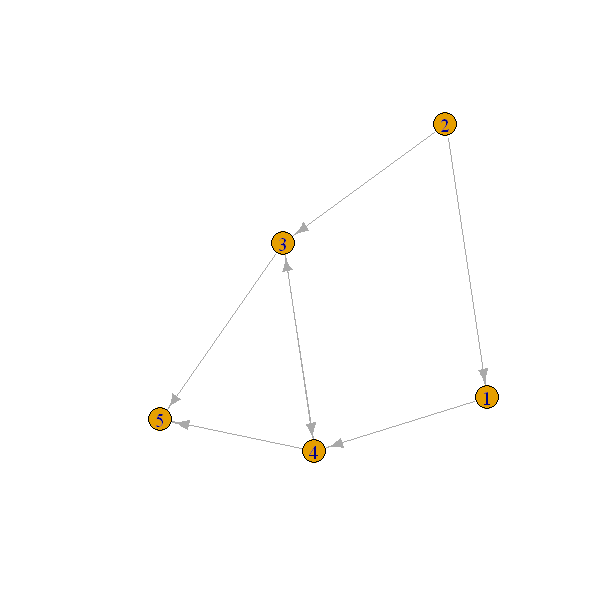

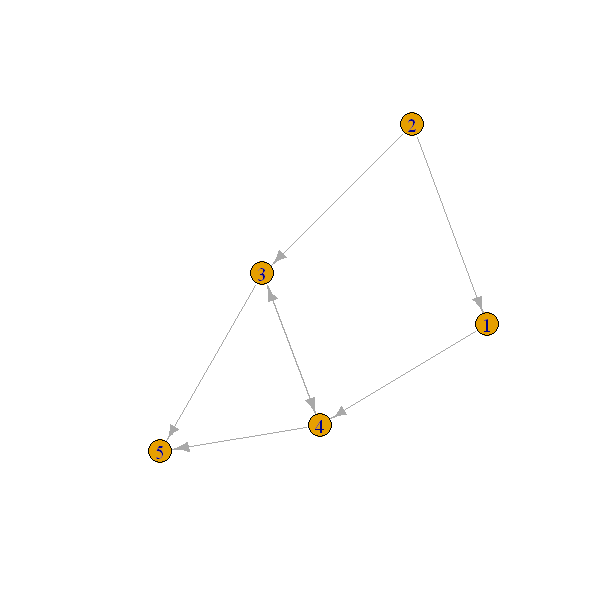

In [11]:
options(repr.plot.width=5, repr.plot.height=5) # this resizes the plot area (default = 7 by 7)
plot(Gr)       #both perform the same function in most case
plot.igraph(Gr1)       #both perform the same function in most case

<p>
    <strong>Nodes can be named using strings in these graphs:</strong>
</p>

In [13]:
Gr2 <-  make_empty_graph() %>% # creates an empty graph
        add_vertices(6) %>% # adds six unnamed and unconnected vertices
        set_vertex_attr("name", value = c(1:5, "Foo")) # sets the vertex names to 1,2,3,4,5,Foo
summary(Gr2)
vertex_attr(Gr2, "name") # this lists the "Name" attributes in our Gr2 graph

IGRAPH c826db8 DN-- 6 0 -- 
+ attr: name (v/c)


[1] "1"   "2"   "3"   "4"   "5"   "Foo"

<strong>Let's see what our <span style = "font-family: Courier New">Gr2</span> graph looks like:</strong>

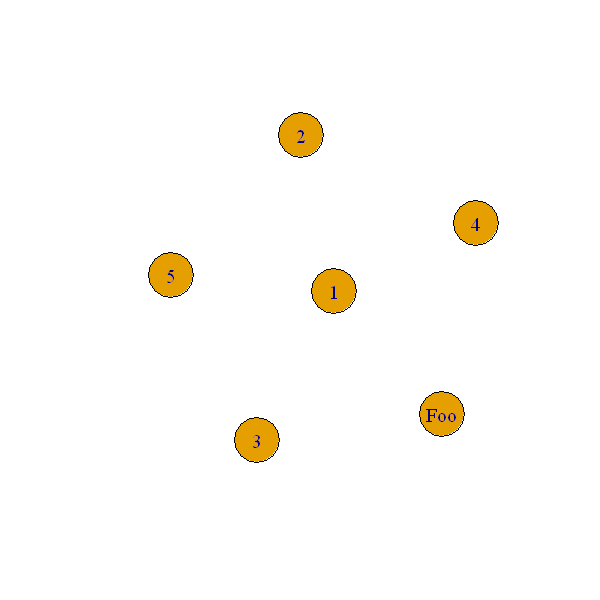

In [14]:
plot(Gr2, vertex.size = 30) # this draws the Gr2 graph with a larger node size (default = 15)

<strong>We only have nodes but no edges, which is not very useful, so let's add an edge:</strong>

In [15]:
Gr2 <- Gr2 %>% add_edges(c(1,"Foo")) # adds a directed edge between 1 and 'Foo'
summary(Gr2)

IGRAPH ded83b9 DN-- 6 1 -- 
+ attr: name (v/c)


<p> And now let's plot the <span style = "font-family: Courier New">Gr2</span> graph again:</p>

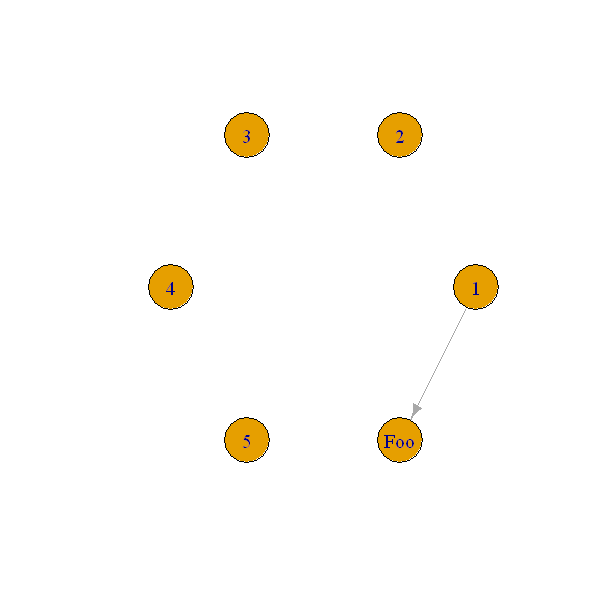

In [16]:
plot(Gr2, vertex.size = 30, layout = layout.circle) # layout = layout.circle does what you think, it draws a ring graph

<strong>We can add multiple edges at a time in different ways:</strong>

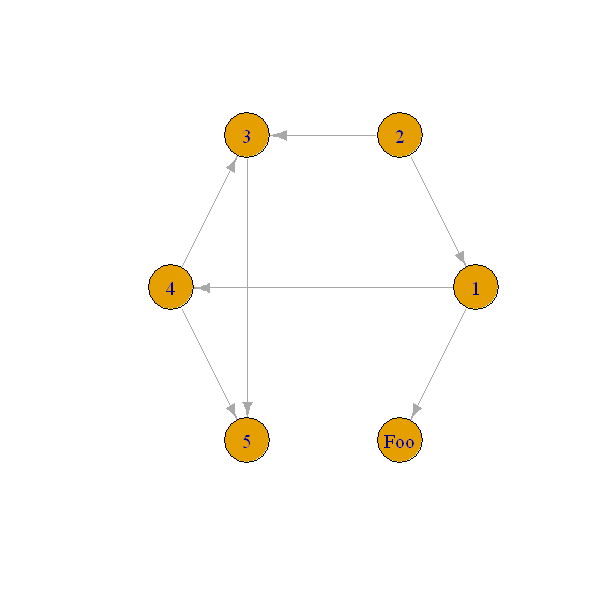

In [17]:
Gr2 <- Gr2 %>% 
  add_edges(c(4,5)) + # adds a single edge from 4 to 5
  path(2,1,4,3) +  # adds a path of edges from 2 to 1 to 4 to 3
  path(2,3,5) # adds another path from 2 to 3 to 5
plot(Gr2, vertex.size = 30, layout = layout.circle)


<strong>Note the use of different pipe operators here.</strong>
<p>We could use the %>% operator with the <span style = "font-family: Courier New">add_edges</span> function, but had to use a different pipe operator (this time a '+') for the <span style = "font-family: Courier New">path</span> function.</p>
<p>The pipe used will vary dependent upon the function being used after it, so make sure to check the <span style = "font-family: Courier New">iGraph</span> documentation if you run into issues.</p>

<h1 style = "font-size: 400%">Graph Attributes</h1>

<p>Attributes can represent almost anything about the system you are modelling using a graph/network, as well as how edges and/or vertices are displayed.</p>

<strong>Graphs, edges and nodes can all have attributes</strong>
<ul>
    <li>You can assign nearly any attribute of your choosing</li>
    <li>They won't all be used automatically when we plot the graph, but can be useful for more advanced analysis/plotting</li>
</ul>

$color
[1] "red"  "red"  "red"  "red"  "red"  "red"  "red"  "blue"

$weight
[1] 1 2 3 4 5 6 7 8

$note
[1] "This"      "can"       "be"        "anything"  "you"       "want"     
[7] "$x^2$"     "$covfefe$"

$color
[1] "red"  "red"  "red"  "red"  "red"  "red"  "red"  "blue"

+ 8/8 edges from b5f2fda (vertex names):
  tail head tid hid weight      note color
1    1  Foo   1   6      1      This   red
2    4    5   4   5      2       can   red
3    2    1   2   1      3        be   red
4    1    4   1   4      4  anything   red
5    4    3   4   3      5       you   red
6    2    3   2   3      6      want   red
7    3    5   3   5      7     $x^2$   red
8  Foo    5   6   5      8 $covfefe$  blue

+ 1/8 edge from b5f2fda (vertex names):
  tail head tid hid weight  note color
7    3    5   3   5      7 $x^2$   red

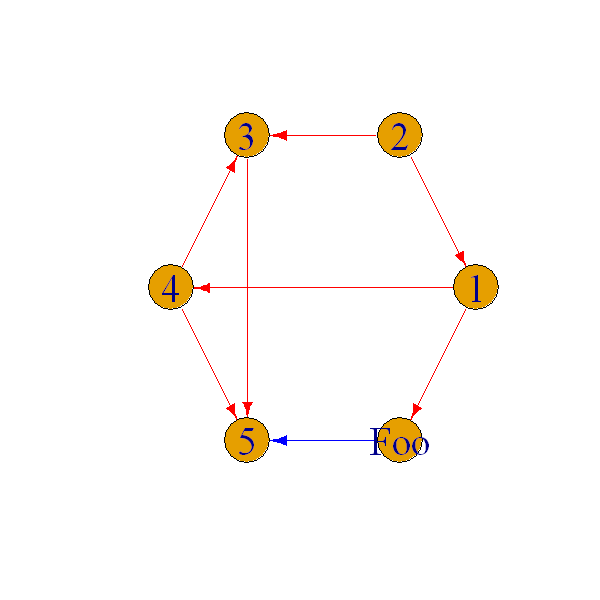

In [18]:
Gr3 <- Gr2 %>% # this copies the graph Gr2 as a new igraph object Gr3
       set_edge_attr("color", value = "red") %>% #sets the color attribute of all current edges to red
       add_edges(c("Foo",5), color = "blue") # Adds one additonal edge from Foo to 5, and colors it blue
edge_attr(Gr3) # this prints out the attributes currently assigned to the graph's edges

# this next line shows a more sophisticated way of adding a set of values to multiple edge attributes
edge_attr(Gr3) <-  list("weight" = c(1,2,3,4,5,6,7,8),
                        "note" = c("This","can","be","anything","you","want","$x^2$","$covfefe$"),
                        "color" = c(rep("red",7),"blue"))
edge_attr(Gr3) # this prints out the attributes currently assigned to the graph's edges
plot(Gr3, vertex.size = 30, vertex.label.cex = 2, layout = layout.circle) # note we have increased the node's label size
E(Gr3)[[]]  # this drills into the edges info further, providing an array of each edge's information
E(Gr3)[[7]]   # this returns the edge info for the edge identified as the seventh edge

 <p>Note that the edge colours <b>do</b> reflect what we have instructed in our code.</p>


<h1 style = "font-size:400%">Let's obtain some basic information from the network</h1>

<strong>First let's add some addtional edges, then count the edges and nodes from our graph object and print these out in our console output</strong>

[1] "Gr4 has 6 nodes"

[1] "Gr4 has 12 edges"

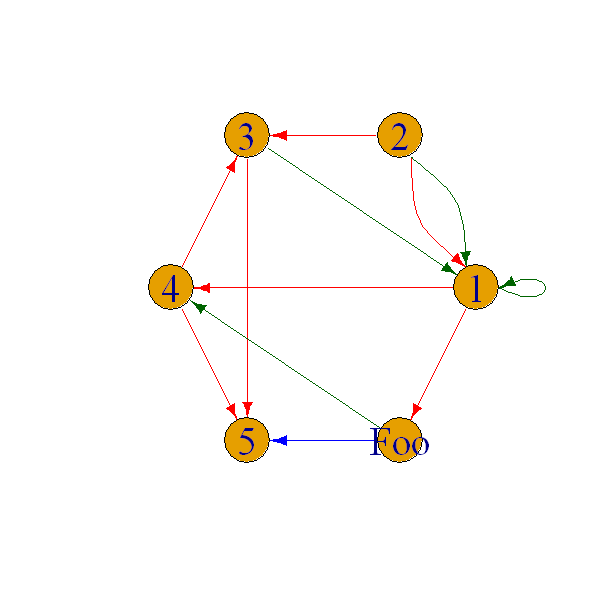

In [19]:
Gr4 <- Gr3 %>%
  add_edges(c('Foo',4,3,1,2,1,1,1), color = "darkgreen") # we are adding 4 new edges and colouring them dark green

paste0("Gr4 has ",gorder(Gr4)," nodes") # gorder(Gr4) counts the number of nodes in 'Gr4'
paste0("Gr4 has ",gsize(Gr4)," edges") # gsize(Gr4) counts the number of edges in 'Gr4'

plot(Gr4, vertex.size = 30, vertex.label.cex = 2, layout = layout.circle)

<h1 style = "font-size:400%">Obtaining some more information about our graph</h1>
  <ul>
    <li>Extracting nodes and their neighbours</li>
    <li>Finding out how many neighbours each node has</li>
    <li>Size of the graph</li>
    <li>Number of edges</li>
    <li>Sum total of edge weights</li>
 
<strong>We can <i>iterate</i> over edges and nodes to obtain information about the graph:</strong>

[1] "1 is a node"
[1] "2 is a node"
[1] "3 is a node"
[1] "4 is a node"
[1] "5 is a node"
[1] "Foo is a node"
[1] "there is an edge from 1 to Foo"
[1] "there is an edge from 4 to 5"
[1] "there is an edge from 2 to 1"
[1] "there is an edge from 1 to 4"
[1] "there is an edge from 4 to 3"
[1] "there is an edge from 2 to 3"
[1] "there is an edge from 3 to 5"
[1] "there is an edge from Foo to 5"
[1] "there is an edge from Foo to 4"
[1] "there is an edge from 3 to 1"
[1] "there is an edge from 2 to 1"
[1] "there is an edge from 1 to 1"


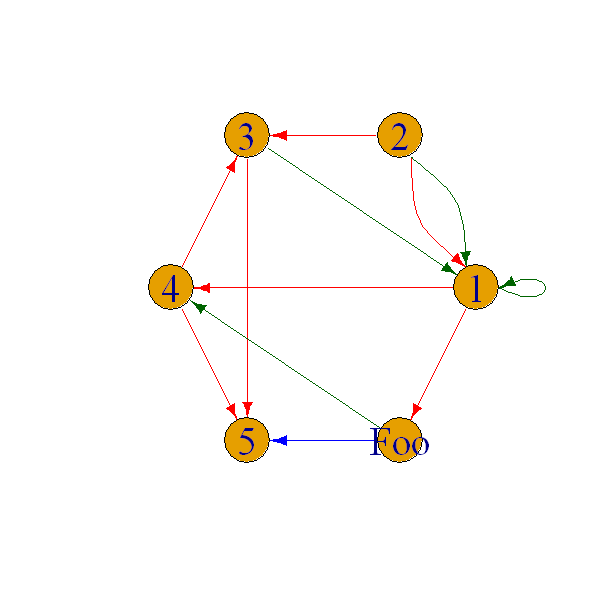

In [24]:
for (i in 1:length(V(Gr4))){ # this code wil iterate through the number of nodes in Gr4 and print out
    print(paste0(V(Gr4)[i]$name," is a node"))
}

for (j in 1:length(E(Gr4))){ # this loop will print out the head (from) and tail (to) nodes of the Gr4 graph
  print(paste0("there is an edge from ",V(Gr4)[tail_of(Gr4,j)]$name, " to ",V(Gr4)[head_of(Gr4,j)]$name))
}

plot(Gr4, vertex.size = 30, vertex.label.cex = 2, layout = layout.circle)

<h1 style = "font-size:400%">Identifying the Neighbourhood of Each Node</h1>
<p>The command <b style = "font-family: Courier">get.adjlist()</b> identifies each node's immediate edges and returns a list of (directed) connections from one node to another:</p>

In [29]:
for (node in 1:length(V(Gr4))){ # this loop lists the directed connections for each connected node
  print(paste0(V(Gr4)[node]$name, " is connected to ",get.adjlist(Gr4, mode = "out")[node][[1]]))
}

[1] "1 is connected to 1" "1 is connected to 4" "1 is connected to 6"
[1] "2 is connected to 1" "2 is connected to 1" "2 is connected to 3"
[1] "3 is connected to 1" "3 is connected to 5"
[1] "4 is connected to 3" "4 is connected to 5"
[1] "5 is connected to "
[1] "Foo is connected to 4" "Foo is connected to 5"


<h1 style = "font-size:400%">Degree of a Node</h1>
<p>The <b style = "font-family: Courier">degree()</b> function returns how many total edges each node has:</p>

[1] "node 1 has degree 4"
[1] "node 2 has degree 0"
[1] "node 3 has degree 2"
[1] "node 4 has degree 2"
[1] "node 5 has degree 3"
[1] "node Foo has degree 1"


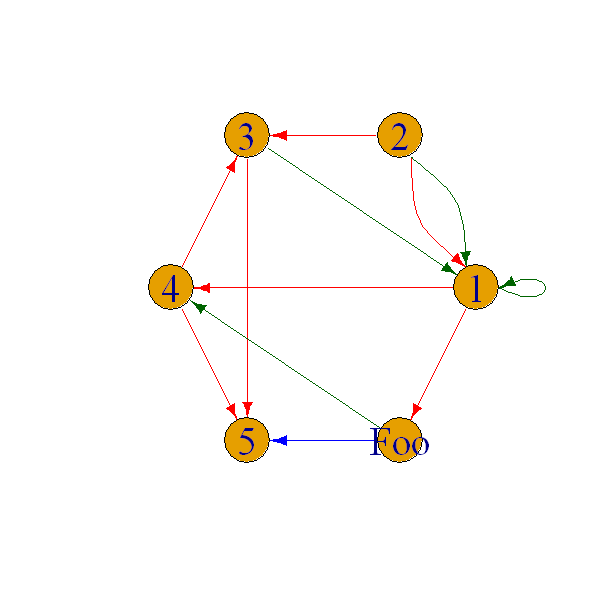

In [31]:
for (node in V(Gr4)){
  print(paste0("node ", V(Gr4)[node]$name, " has degree ", degree(Gr4, mode = "in")[node]))
}

plot(Gr4, vertex.size = 30, vertex.label.cex = 2, layout = layout.circle)

<h1 style = "font-size:400%">Sum Value of an Edge's Attribute</h1>
<p>The ability to calculate the total value of a particular edge attribute (or node attribute) is important in network analysis.  </p>
<p>For example, a  numerical edge attribute could define the length of high-pressure piping in a gas transmission network between two network nodes, and we need to know how much piping needs to be replaced in an upgrade to the pipe network.</p>
<p>Therefore being able to sum together the value of a particular edge attribute can be a useful network metric to obtain.</p>
<P><b>To calculate the total of the edge weights in Gr4, we first need to check that all edges have weight values:</b></p>


In [21]:
E(Gr4)[[]] #prints all of the edge information for Gr4 to the console 

+ 12/12 edges from 0dc99ac (vertex names):
   tail head tid hid weight      note     color
1     1  Foo   1   6      1      This       red
2     4    5   4   5      2       can       red
3     2    1   2   1      3        be       red
4     1    4   1   4      4  anything       red
5     4    3   4   3      5       you       red
6     2    3   2   3      6      want       red
7     3    5   3   5      7     $x^2$       red
8   Foo    5   6   5      8 $covfefe$      blue
9   Foo    4   6   4     NA      <NA> darkgreen
10    3    1   3   1     NA      <NA> darkgreen
11    2    1   2   1     NA      <NA> darkgreen
12    1    1   1   1     NA      <NA> darkgreen

<p>We can see that edges 9-12 have <span style = "font-family: Courier New">NA</span> as 'weight' values (along with <span style = "font-family: Courier New">NA</span> values for the attribute 'note').</p>

<p> If we try to sum the weights then we will not receive a value due to the <span style = "font-family: Courier New">NA</span>s present, so let's add values to these edges for the weight (and note) attributes:</p>

In [32]:
Gr4 <- Gr4 %>% 
        set_edge_attr("weight", value = c(9:12), index = E(Gr4)[9:12]) %>% # check the iGraph documentation for details
        set_edge_attr("note", value = c("I", "want", "a", "vaccine"), index = E(Gr4)[9:12])
E(Gr4)[[]]

+ 12/12 edges from 0dc99ac (vertex names):
   tail head tid hid weight      note     color
1     1  Foo   1   6      1      This       red
2     4    5   4   5      2       can       red
3     2    1   2   1      3        be       red
4     1    4   1   4      4  anything       red
5     4    3   4   3      5       you       red
6     2    3   2   3      6      want       red
7     3    5   3   5      7     $x^2$       red
8   Foo    5   6   5      8 $covfefe$      blue
9   Foo    4   6   4      9         I darkgreen
10    3    1   3   1     10      want darkgreen
11    2    1   2   1     11         a darkgreen
12    1    1   1   1     12   vaccine darkgreen

<p>We can now use the <span style = "font-family: Courier New">strength()</span> function to calculate the weights of all edges:</p>

In [21]:
print(paste0("Gr4 has ",gsize(Gr4)," edges"))
print(paste0("The total weight of the Gr4 graph's edges is ",sum(strength(Gr4, mode = "out")),"."))

[1] "Gr4 has 12 edges"
[1] "The total weight of the Gr4 graph's edges is 78."


<p> The code snippet <span style = "font-family: Courier New">sum(strength(Gr4, mode = "out"))</span> adds together the weights of all outgoing edges, which can also be described as the sum of the unique weights of all directed edges.</p>
<p> If you change the code to <span style = "font-family: Courier New">sum(strength(Gr4, mode = "in"))</span>, you will see that the result is the same - think about why this is the case...</p>

<h1 style = "font-size:400%">Node Attributes</h1>
<p>All currently edges have attributes but none of the nodes have any attributes, so let's create a new graph object based upon Gr4, and add attributes to some new nodes:</p>

In [34]:
Gr5 <- Gr4 %>% # copies Gr4 into a new object called Gr5
  add_vertices(1, name = "42", answer = "Life, the Universe and Everything") %>% #adds a new node called "42" with an attribute called "answer"
  add_vertices(1, name = 6, jeopardy="What's 3 times 2?") # adds a new node called 6 with an attribute called jeopardy
Gr5 <-  Gr5 %>% set_vertex_attr("jeopardy", index = V(Gr5)[6], value = "___ Fighters") #sets the jeopardy attribute for the node with index 6 to a string value "___ Fighters"
V(Gr5)[[]] # prints to console all of the vertex/node information in Gr5

+ 8/8 vertices, named, from 2a6b80f:
  name                            answer          jeopardy
1    1                              <NA>              <NA>
2    2                              <NA>              <NA>
3    3                              <NA>              <NA>
4    4                              <NA>              <NA>
5    5                              <NA>              <NA>
6  Foo                              <NA>      ___ Fighters
7   42 Life, the Universe and Everything              <NA>
8    6                              <NA> What's 3 times 2?

<p>As mentioned earlier, we can set the attributes to (almost) pretty much anything we like!</p>

<h1 style = "font-size:400%">Some Further Plotting Options</h1>
<p>We can use the edge weight attribute to set the thickness of the edge connectors in our plot:</p>

[1]  1  2  3  4  5  6  7  8  9 10 11 12

+ 12/12 edges from 2a6b80f (vertex names):
   tail head tid hid weight      note     color
1     1  Foo   1   6      1      This       red
2     4    5   4   5      2       can       red
3     2    1   2   1      3        be       red
4     1    4   1   4      4  anything       red
5     4    3   4   3      5       you       red
6     2    3   2   3      6      want       red
7     3    5   3   5      7     $x^2$       red
8   Foo    5   6   5      8 $covfefe$      blue
9   Foo    4   6   4      9         I darkgreen
10    3    1   3   1     10      want darkgreen
11    2    1   2   1     11         a darkgreen
12    1    1   1   1     12   vaccine darkgreen

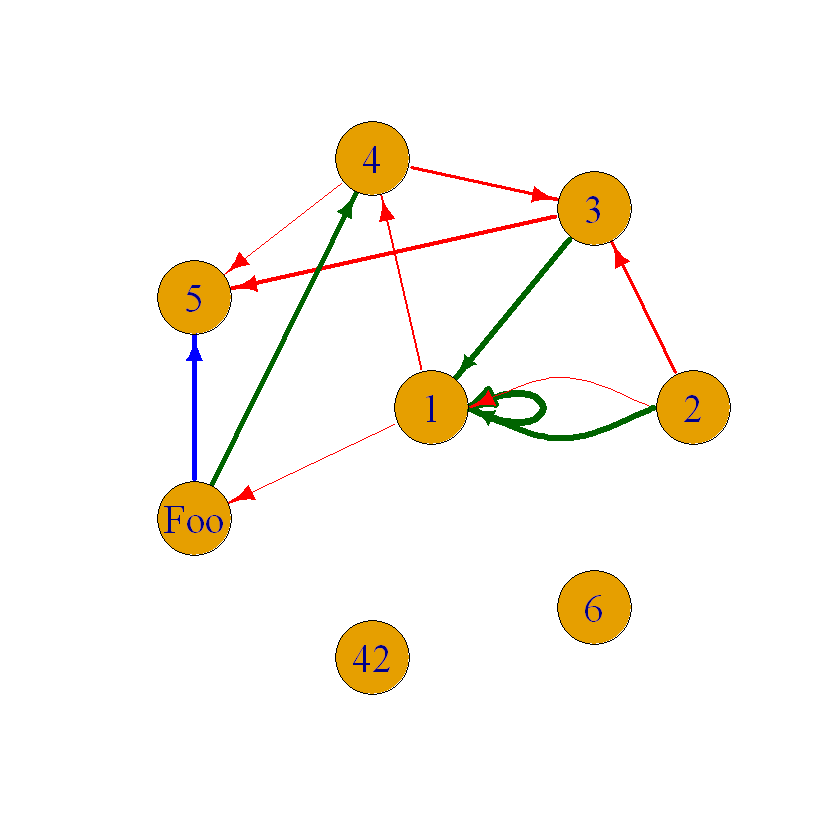

In [43]:
options(repr.plot.width=7, repr.plot.height=7) # this resizes the plot area (default = 7 by 7)
plot.igraph(Gr5, vertex.size = 30, vertex.label.cex = 2, layout = layout.star, edge.width = E(Gr5)$weight*0.5)
E(Gr5)$weight
E(Gr5)[[]]

<p>Note that I have used <span style = "font-family: Courier New">plot.igraph</span> here instead of plot - in most cases these return exactly the same output.</p>
<p> I have also change the layout specification to <span style = "font-family: Courier New">layout.star</span> which draws a star graph layout using the Gr5 object.</p>
<p>We will return to further graph/network plotting options further on in the module.</p>

<h1 style = "font-size:400%">Visualising Network/Graph Summary Data</h1>
<p> It is a good idea to be able to extract and visualize the summary data of a graph/network.</p>
<p>We can generate plots of a graph's summary data.</p>
<p>For example, we can generate a histogram of the degree connectivity within a graph.</p>
<p>Note that the <span style = "font-family: Courier New">breaks</span> command sets the number and span of the bins the histogram uses to group the data.</p>

1   2   3   4   5 Foo  42   6 
  7   3   4   4   3   3   0   0

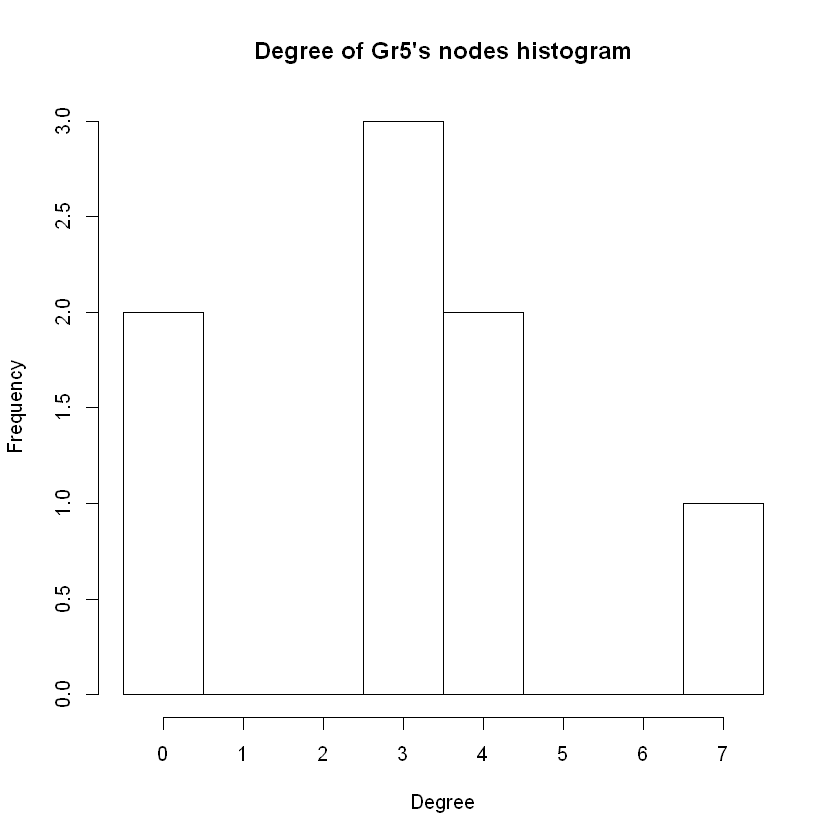

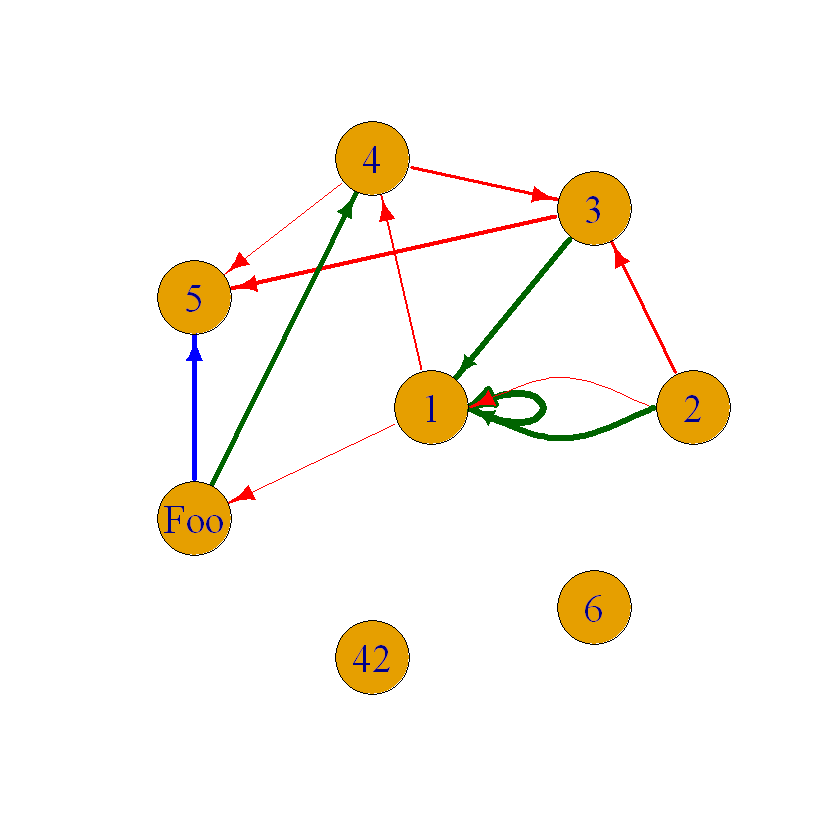

In [48]:
degree(Gr5, mode="all") # lists the node names and their respective degrees
hist1 <- hist(degree(Gr5, mode="all"), breaks=(min(degree(Gr5))-0.5):(max(degree(Gr5))+0.5), main="Degree of Gr5's nodes histogram", xlab = "Degree",
              xaxt="n")
axis(side=1,at=hist1$mids,labels=seq(0,7))
plot.igraph(Gr5, vertex.size = 30, vertex.label.cex = 2, layout = layout.star, edge.width = E(Gr5)$weight*0.5)

<p>We will return to calculate more data regarding networks/graphs using <span style = "font-family: Courier New">iGraph</span> in later sessions.</p>

<strong>In further sessions, we will cover some more network metrics and how to calculate them in R, as well as what they can tell us about the data.</strong>